# Gradient Boost

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Train Test Split

In [16]:
x= pd.get_dummies(df.drop("class" , axis=1),drop_first=True)
y= df["class"]

In [19]:
x

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
 x, y, test_size=0.1, random_state=9)

# Grid Search and GBOOST

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
parametre ={
    "n_estimators":[1,3,5,10,20,50,100],
    "max_depth":[2,3,4,5,6]
    }

In [9]:
grad_boost = GradientBoostingClassifier()

In [10]:
grid = GridSearchCV(grad_boost,parametre)

In [11]:
grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
mantar_pred = grid.predict(X_test)

# METRİC

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

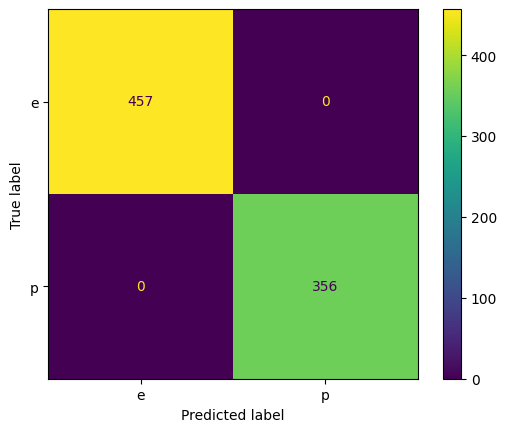

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

Veriye bakıldığında sanki aşırı öğrenme yapmış gibi durabilir.
Bunu nasıl anlayabiliriz?

Ada boost eğitiminde hata oranı tablosunu incelerseniz oradan modelin aşırı öğrenme yapmadığını anlayabilirsiniz.Hata oranının belirli aralıklarda hareketli , bir yerden sonra durağan olması bize overfitting üzerinde yorum yapma yetisi sağlar.Yani bu dataframe in aşırı öğrenme yapmadığını anlayabiliriz. 

In [ ]:
print(classification_report(y_test,mantar_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [ ]:
feat = grid.best_estimator_.feature_importances_

In [ ]:
feat_df = pd.DataFrame(index=x.columns ,
                       columns=["Katsayılar"],
                       data =feat                     
                       )

In [ ]:
feat_df

# 0 oların dikkat edilecek bir katsayı olmadağını söylüyor

,Katsayılar
cap-shape_c,1.199477e-04
cap-shape_f,5.855655e-18
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,4.621047e-16
habitat_p,0.000000e+00
habitat_u,5.869194e-05


In [ ]:
feat_df.sort_values("Katsayılar" , ascending=True).transpose()

,cap-shape_s,cap-shape_k,cap-surface_s,cap-shape_x,cap-color_r,cap-color_u,cap-color_g,gill-color_e,gill-color_h,gill-color_g,...,gill-size_n,gill-spacing_w,stalk-root_r,odor_f,odor_l,spore-print-color_r,stalk-surface-below-ring_y,bruises_t,stalk-root_c,odor_n
Katsayılar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009287,0.009999,0.015778,0.019166,0.022198,0.031951,0.053955,0.054389,0.130148,0.612097


In [ ]:
feat_df = feat_df[feat_df["Katsayılar"] > 0.001]

In [ ]:
feat_df.sort_values("Katsayılar" , ascending=True).transpose()

,odor_c,cap-surface_g,population_c,stalk-color-above-ring_w,cap-color_y,spore-print-color_h,stalk-color-below-ring_w,spore-print-color_w,stalk-color-below-ring_y,stalk-surface-below-ring_s,...,gill-size_n,gill-spacing_w,stalk-root_r,odor_f,odor_l,spore-print-color_r,stalk-surface-below-ring_y,bruises_t,stalk-root_c,odor_n
Katsayılar,0.001024,0.001575,0.001623,0.001896,0.00226,0.002388,0.002424,0.002576,0.002837,0.003629,...,0.009287,0.009999,0.015778,0.019166,0.022198,0.031951,0.053955,0.054389,0.130148,0.612097


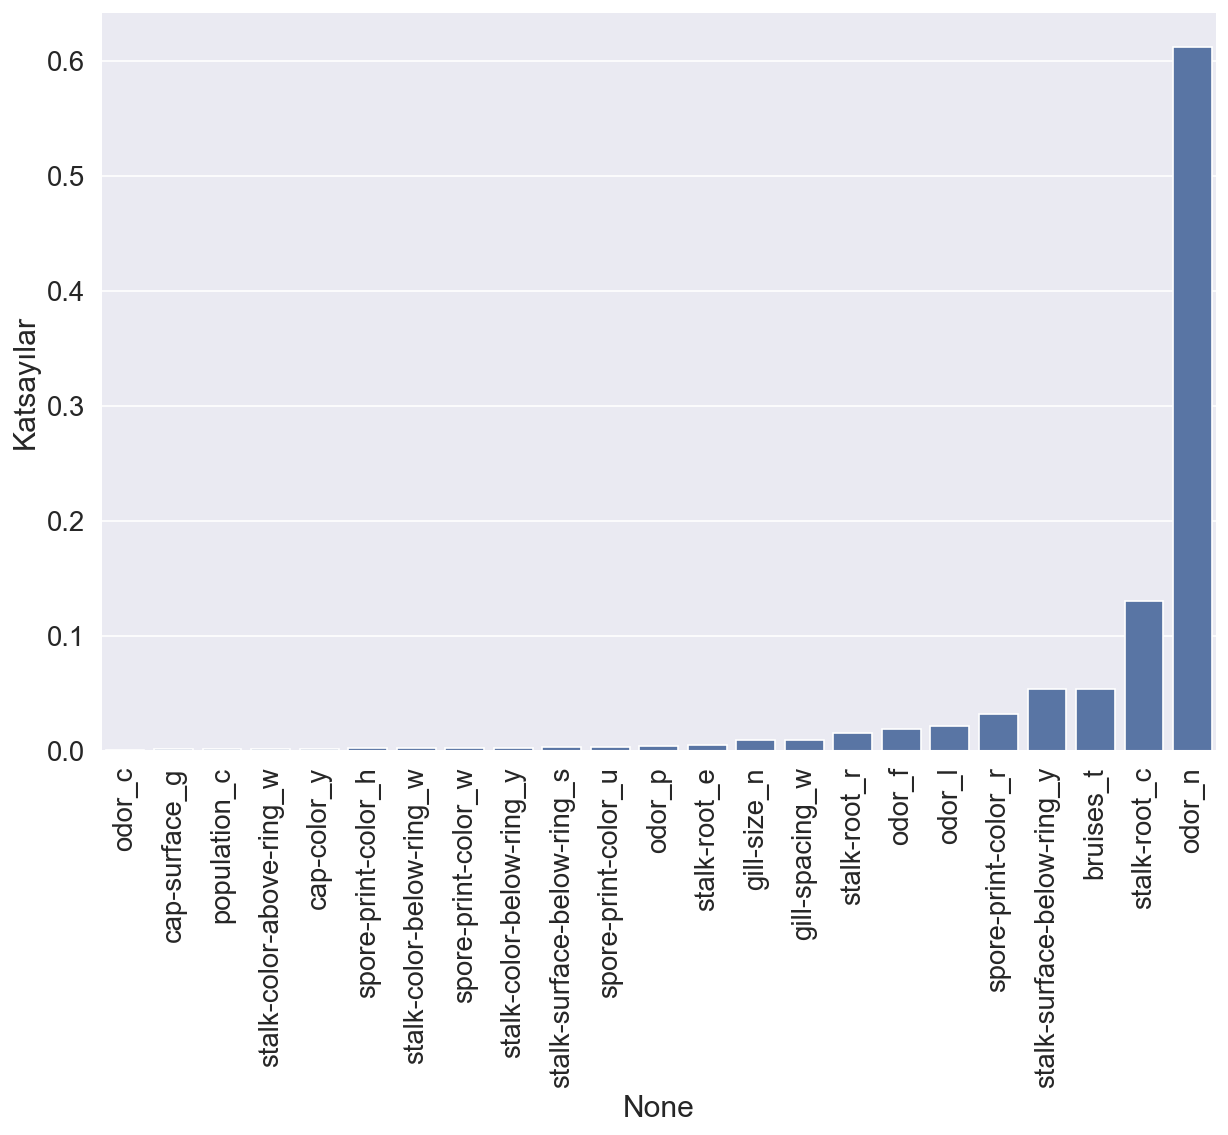

In [ ]:
plt.figure(figsize=(12,8) ,dpi=120)

sns.set_style("whitegrid")
sns.set(font_scale=1.5)
sns.barplot(x=feat_df.sort_values("Katsayılar").index,
            y="Katsayılar",data =feat_df.sort_values("Katsayılar"))

plt.xticks(rotation=90);